In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/jobs_in_data.csv")

In [ ]:
df

work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
0                EUR   88000          95012            Germany   
1                USD  186000         186000      United States   
2                USD   81800          81800      United States   
3                USD  212000         212000      United States   
4                USD   93300          93300      United States   
...              ...     ...            ...                ...   
9350             USD  165000         165000      United States   
9351             USD  412000         412000      United States   
9352             USD  151000         151000      United States   
9353             USD  105000         105000      United States   
9354             USD  100000         100000      United States   

     experience_level employment_type work_setting company_location  \
0           Mid-level       Full-time       Hybrid          Germany   
1              Senior       Full-time    In-person    United States   
2              Senior       Full-time    In-person    United States   
3              Senior       Full-time    In-person    United States   
4              Senior       Full-time    In-person    United States   
...               ...             ...          ...              ...   
9350           Senior       Full-time       Remote    United States   
9351           Senior       Full-time       Remote    United States   
9352        Mid-level       Full-time       Remote    United States   
9353      Entry-level       Full-time       Remote    United States   
9354      Entry-level        Contract       Remote    United States   

     company_size  
0               L  
1               M  
2               M  
3               M  
4               M  
...           ...  
9350            L  
9351            L  
9352            L  
9353            S  
9354            L  

[9355 rows x 12 columns]

In [ ]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.infer_objects()

work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
0                EUR   88000          95012            Germany   
1                USD  186000         186000      United States   
2                USD   81800          81800      United States   
3                USD  212000         212000      United States   
4                USD   93300          93300      United States   
...              ...     ...            ...                ...   
9350             USD  165000         165000      United States   
9351             USD  412000         412000      United States   
9352             USD  151000         151000      United States   
9353             USD  105000         105000      United States   
9354             USD  100000         100000      United States   

     experience_level employment_type work_setting company_location  \
0           Mid-level       Full-time       Hybrid          Germany   
1              Senior       Full-time    In-person    United States   
2              Senior       Full-time    In-person    United States   
3              Senior       Full-time    In-person    United States   
4              Senior       Full-time    In-person    United States   
...               ...             ...          ...              ...   
9350           Senior       Full-time       Remote    United States   
9351           Senior       Full-time       Remote    United States   
9352        Mid-level       Full-time       Remote    United States   
9353      Entry-level       Full-time       Remote    United States   
9354      Entry-level        Contract       Remote    United States   

     company_size  
0               L  
1               M  
2               M  
3               M  
4               M  
...           ...  
9350            L  
9351            L  
9352            L  
9353            S  
9354            L  

[9355 rows x 12 columns]

In [ ]:
df.iteritems()

<generator object DataFrame.iteritems at 0x79cee9a195b0>

In [ ]:
df.all()

work_year             True
job_title             True
job_category          True
salary_currency       True
salary                True
salary_in_usd         True
employee_residence    True
experience_level      True
employment_type       True
work_setting          True
company_location      True
company_size          True
dtype: bool

In [ ]:
df.corr()

work_year    salary  salary_in_usd
work_year       1.000000  0.160708       0.166003
salary          0.160708  1.000000       0.991309
salary_in_usd   0.166003  0.991309       1.000000

In [ ]:
df.describe()

work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   63608.835387   63177.372024
min    2020.000000   14000.000000   15000.000000
25%    2023.000000  105200.000000  105700.000000
50%    2023.000000  143860.000000  143000.000000
75%    2023.000000  187000.000000  186723.000000
max    2023.000000  450000.000000  450000.000000

In [ ]:
#  the more salary with repected to job categories and title

df.groupby(['job_title', 'job_category']).agg({'salary': 'mean'})


salary
job_title                       job_category                            
AI Architect                    Machine Learning and AI    249000.000000
AI Developer                    Machine Learning and AI    140500.000000
AI Engineer                     Machine Learning and AI    169208.416667
AI Programmer                   Machine Learning and AI     74000.000000
AI Research Engineer            Data Science and Research   67275.000000
...                                                                  ...
Sales Data Analyst              Data Analysis               60000.000000
Software Data Engineer          Data Engineering           120000.000000
Staff Data Analyst              Data Analysis               84999.333333
Staff Data Scientist            Data Science and Research  134500.000000
Staff Machine Learning Engineer Machine Learning and AI    185000.000000

[125 rows x 1 columns]

In [ ]:
#  how much  job are increased in year with repect to salary and  experience level

df.groupby(['work_year', 'experience_level'])['salary'].sum().reset_index()


work_year experience_level     salary
0        2020      Entry-level    1649200
1        2020        Executive     710000
2        2020        Mid-level    2665409
3        2020           Senior    2553200
4        2021      Entry-level    2920344
5        2021        Executive    1785000
6        2021        Mid-level    7568555
7        2021           Senior    9257620
8        2022      Entry-level    9152360
9        2022        Executive    7769075
10       2022        Mid-level   35852839
11       2022           Senior  167745760
12       2023      Entry-level   30602533
13       2023        Executive   42600158
14       2023        Mid-level  170693886
15       2023           Senior  909050326

<Axes: >

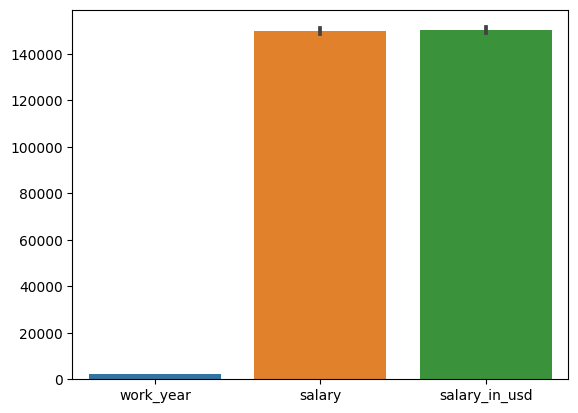

In [ ]:
sns.barplot(df)

<Axes: >

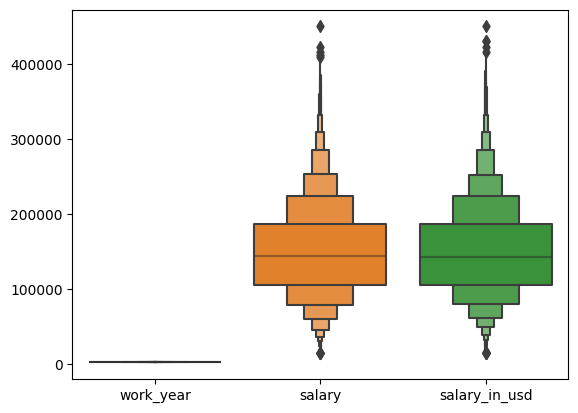

In [ ]:
sns.boxenplot(df)

In [ ]:
df1 = df.copy()

In [ ]:
df1

work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
0                EUR   88000          95012            Germany   
1                USD  186000         186000      United States   
2                USD   81800          81800      United States   
3                USD  212000         212000      United States   
4                USD   93300          93300      United States   
...              ...     ...            ...                ...   
9350             USD  165000         165000      United States   
9351             USD  412000         412000      United States   
9352             USD  151000         151000      United States   
9353             USD  105000         105000      United States   
9354             USD  100000         100000      United States   

     experience_level employment_type work_setting company_location  \
0           Mid-level       Full-time       Hybrid          Germany   
1              Senior       Full-time    In-person    United States   
2              Senior       Full-time    In-person    United States   
3              Senior       Full-time    In-person    United States   
4              Senior       Full-time    In-person    United States   
...               ...             ...          ...              ...   
9350           Senior       Full-time       Remote    United States   
9351           Senior       Full-time       Remote    United States   
9352        Mid-level       Full-time       Remote    United States   
9353      Entry-level       Full-time       Remote    United States   
9354      Entry-level        Contract       Remote    United States   

     company_size  
0               L  
1               M  
2               M  
3               M  
4               M  
...           ...  
9350            L  
9351            L  
9352            L  
9353            S  
9354            L  

[9355 rows x 12 columns]

<Axes: >

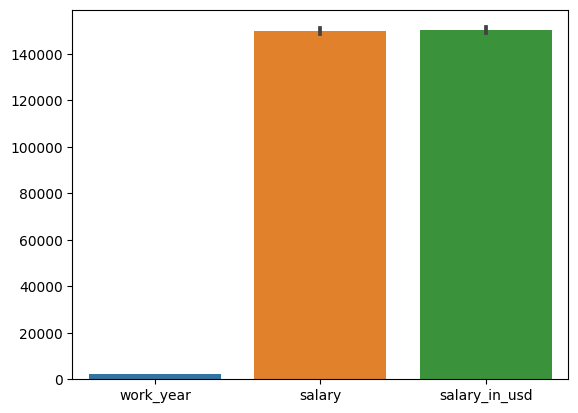

In [ ]:
sns.barplot(df1)

<Axes: >

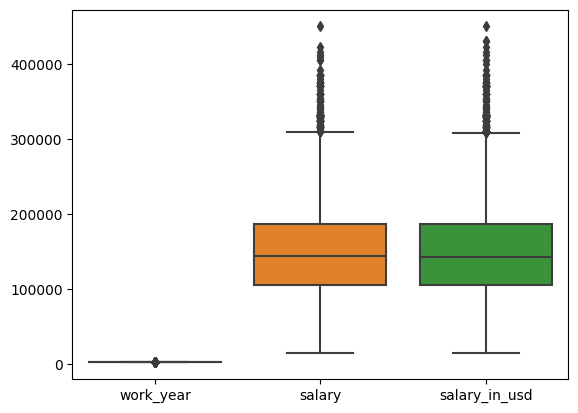

In [ ]:
sns.boxplot(df1)

<Axes: >

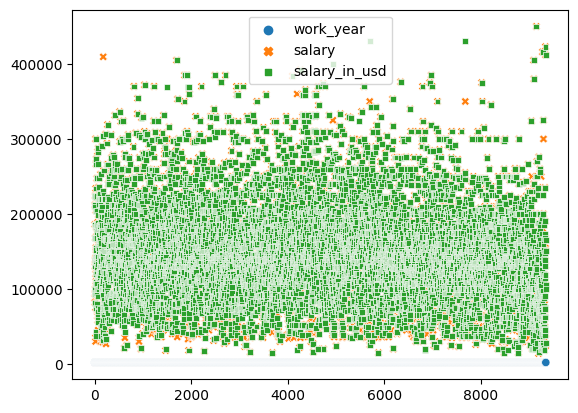

In [ ]:
sns.scatterplot(df1)

In [ ]:
px.scatter(df, x="job_title", y="salary_in_usd")

In [ ]:
px.bar(df, x="job_title", y="salary")

In [ ]:
px.pie(df, values='salary', names='job_category', title='job generating with repected to job title and its salary')

<Axes: ylabel='count'>

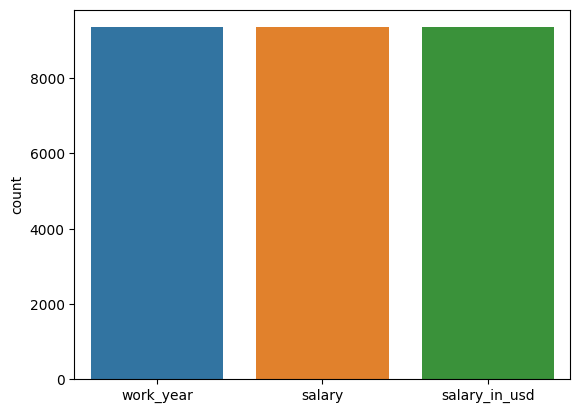

In [ ]:
sns.countplot(df)

In [ ]:
px.histogram(df, x ="job_category")

In [ ]:
px.density_heatmap(df, x="salary")

In [ ]:
px.funnel(df, x="salary_in_usd")

In [ ]:
px.line(df, x="job_title", y="work_setting", title='the job titles and work environment ')

In [ ]:
 px.histogram(df, x="work_year", y="job_category", color="salary")

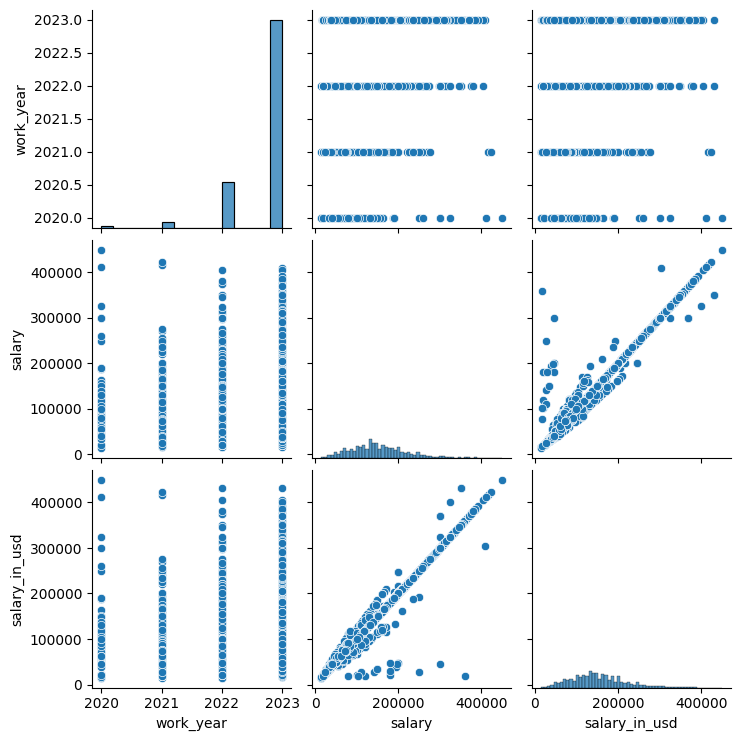

In [ ]:
sns.pairplot(df)

In [ ]:
px.violin(df, y="employment_type")

In [ ]:
px.parallel_categories(df)

In [ ]:
 px.scatter(df, x="work_year", y="salary", trendline="lowess")

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning:

invalid value encountered in divide



In [ ]:
px.line(df, x='work_year',y="job_title")

In [ ]:
fig = px.timeline(df, x_start="work_year", x_end="work_year", y="salary_in_usd")
fig.show()

In [ ]:
# Define criteria for categorizing company sizes
small_threshold = 100  # Example threshold for small companies
medium_threshold = 1000  # Example threshold for medium companies

# Create a new column 'Company_Size' based on the criteria1 of 4
#Use code with caution
df['Company_Size'] = pd.cut(df['salary'], bins=[0, small_threshold, medium_threshold, float('inf')],
                            labels=['Small', 'Medium', 'Large'], right=False)


In [ ]:
# Assuming 'job_title' is a categorical column
df = pd.get_dummies(df, columns=['job_title'], prefix='job')

# Now 'job_title' has been one-hot encoded into multiple binary columns

In [ ]:
 #Display information about the DataFrame, including data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Columns: 137 entries, work_year to job_Staff Machine Learning Engineer
dtypes: category(1), int64(3), object(8), uint8(125)
memory usage: 1.9+ MB
None


In [ ]:
df = pd.get_dummies(df, columns=['job_category'], prefix='Data Management and Strategy')

In [ ]:
print(df.dtypes)


work_year                                                     int64
salary_currency                                              object
salary                                                        int64
salary_in_usd                                                 int64
employee_residence                                           object
                                                              ...  
Data Management and Strategy_Data Management and Strategy     uint8
Data Management and Strategy_Data Quality and Operations      uint8
Data Management and Strategy_Data Science and Research        uint8
Data Management and Strategy_Leadership and Management        uint8
Data Management and Strategy_Machine Learning and AI          uint8
Length: 146, dtype: object


In [ ]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in work_year: [2023 2022 2020 2021]
Unique values in salary_currency: ['EUR' 'USD' 'GBP' 'CAD' 'AUD' 'PLN' 'BRL' 'TRY' 'CHF' 'SGD' 'DKK']
Unique values in salary: [ 88000 186000  81800 ... 138350 423000 412000]
Unique values in salary_in_usd: [ 95012 186000  81800 ... 423000  28369 412000]
Unique values in employee_residence: ['Germany' 'United States' 'United Kingdom' 'Canada' 'Spain' 'Ireland'
 'South Africa' 'Poland' 'France' 'Czech Republic' 'Netherlands'
 'Pakistan' 'Ukraine' 'Lithuania' 'Portugal' 'Australia' 'Uganda'
 'Colombia' 'Italy' 'Slovenia' 'Romania' 'Greece' 'India' 'Latvia'
 'Mauritius' 'Armenia' 'Croatia' 'Thailand' 'South Korea' 'Estonia'
 'Turkey' 'Philippines' 'Brazil' 'Qatar' 'Russia' 'Kenya' 'Tunisia'
 'Ghana' 'Belgium' 'Switzerland' 'Andorra' 'Ecuador' 'Peru' 'Mexico'
 'Moldova' 'Nigeria' 'Saudi Arabia' 'Argentina' 'Egypt' 'Uzbekistan'
 'Georgia' 'Central African Republic' 'Finland' 'Austria' 'Singapore'
 'Sweden' 'Kuwait' 'Cyprus' 'Bosnia and Herze

In [ ]:
print(ytrain.dtypes)


uint8


In [ ]:
print(xtrain)


      work_year  salary  salary_in_usd  job_AI Architect  job_AI Developer  \
4071       2023  287500         287500                 0                 0   
3025       2023  156400         156400                 0                 0   
3127       2023   70000          70000                 0                 0   
3019       2023  208500         208500                 0                 0   
5288       2023  283200         283200                 0                 0   
...         ...     ...            ...               ...               ...   
5734       2023   72000          72000                 0                 0   
5191       2023  107500         107500                 0                 0   
5390       2023   94000          94000                 0                 0   
860        2023  260000         260000                 0                 0   
7270       2023  113000         113000                 0                 0   

      job_AI Engineer  job_AI Programmer  job_AI Research Engin

In [ ]:
print(ytrain.unique())


[1 0]


In [ ]:
print(ytrain.dtypes)


uint8


In [ ]:
# Example: Remove currency symbols and convert to numeric
ytrain = ytrain.replace('[\$,]', '', regex=True).astype(float)


In [ ]:
for column in xtrain.columns:
    print(f"Unique values in {column}: {xtrain[column].unique()}")


Unique values in work_year: [2023 2021 2022 2020]
Unique values in salary: [287500 156400  70000 ... 299000 100895  57700]
Unique values in salary_in_usd: [287500 156400  70000 ... 299000 100895  57700]
Unique values in job_AI Architect: [0 1]
Unique values in job_AI Developer: [0 1]
Unique values in job_AI Engineer: [0 1]
Unique values in job_AI Programmer: [0 1]
Unique values in job_AI Research Engineer: [0 1]
Unique values in job_AI Scientist: [0 1]
Unique values in job_AWS Data Architect: [0 1]
Unique values in job_Analytics Engineer: [0 1]
Unique values in job_Analytics Engineering Manager: [0 1]
Unique values in job_Applied Data Scientist: [0 1]
Unique values in job_Applied Machine Learning Engineer: [0 1]
Unique values in job_Applied Machine Learning Scientist: [0 1]
Unique values in job_Applied Scientist: [0 1]
Unique values in job_Autonomous Vehicle Technician: [0 1]
Unique values in job_Azure Data Engineer: [0 1]
Unique values in job_BI Analyst: [0 1]
Unique values in job_BI 

In [ ]:
df

work_year salary_currency  salary  salary_in_usd employee_residence  \
0          2023             EUR   88000          95012            Germany   
1          2023             USD  186000         186000      United States   
2          2023             USD   81800          81800      United States   
3          2023             USD  212000         212000      United States   
4          2023             USD   93300          93300      United States   
...         ...             ...     ...            ...                ...   
9350       2021             USD  165000         165000      United States   
9351       2020             USD  412000         412000      United States   
9352       2021             USD  151000         151000      United States   
9353       2020             USD  105000         105000      United States   
9354       2020             USD  100000         100000      United States   

     experience_level employment_type work_setting company_location  \
0           Mid-level       Full-time       Hybrid          Germany   
1              Senior       Full-time    In-person    United States   
2              Senior       Full-time    In-person    United States   
3              Senior       Full-time    In-person    United States   
4              Senior       Full-time    In-person    United States   
...               ...             ...          ...              ...   
9350           Senior       Full-time       Remote    United States   
9351           Senior       Full-time       Remote    United States   
9352        Mid-level       Full-time       Remote    United States   
9353      Entry-level       Full-time       Remote    United States   
9354      Entry-level        Contract       Remote    United States   

     company_size  ... Data Management and Strategy_BI and Visualization  \
0               L  ...                                                 0   
1               M  ...                                                 0   
2               M  ...                                                 0   
3               M  ...                                                 0   
4               M  ...                                                 0   
...           ...  ...                                               ...   
9350            L  ...                                                 0   
9351            L  ...                                                 0   
9352            L  ...                                                 0   
9353            S  ...                                                 0   
9354            L  ...                                                 0   

      Data Management and Strategy_Cloud and Database  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9350                                                0   
9351                                                0   
9352                                                0   
9353                                                0   
9354                                                0   

      Data Management and Strategy_Data Analysis  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
9350                                           0   
9351                                           0   
9352                                           0   
9353                                           0   
9354                                           1   

     

In [ ]:
columns_to_drop = ['employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location','company_size','Company_Size']

# Check if columns exist before dropping
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(columns=columns_to_drop_existing, inplace=True)


In [ ]:
print(columns_to_drop)

['employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size', 'Company_Size']


In [ ]:
df

work_year salary_currency  salary  salary_in_usd  job_AI Architect  \
0          2023             EUR   88000          95012                 0   
1          2023             USD  186000         186000                 0   
2          2023             USD   81800          81800                 0   
3          2023             USD  212000         212000                 0   
4          2023             USD   93300          93300                 0   
...         ...             ...     ...            ...               ...   
9350       2021             USD  165000         165000                 0   
9351       2020             USD  412000         412000                 0   
9352       2021             USD  151000         151000                 0   
9353       2020             USD  105000         105000                 0   
9354       2020             USD  100000         100000                 0   

      job_AI Developer  job_AI Engineer  job_AI Programmer  \
0                    0                0                  0   
1                    0                0                  0   
2                    0                0                  0   
3                    0                0                  0   
4                    0                0                  0   
...                ...              ...                ...   
9350                 0                0                  0   
9351                 0                0                  0   
9352                 0                0                  0   
9353                 0                0                  0   
9354                 0                0                  0   

      job_AI Research Engineer  job_AI Scientist  ...  \
0                            0                 0  ...   
1                            0                 0  ...   
2                            0                 0  ...   
3                            0                 0  ...   
4                            0                 0  ...   
...                        ...               ...  ...   
9350                         0                 0  ...   
9351                         0                 0  ...   
9352                         0                 0  ...   
9353                         0                 0  ...   
9354                         0                 0  ...   

      Data Management and Strategy_BI and Visualization  \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
9350                                                  0   
9351                                                  0   
9352                                                  0   
9353                                                  0   
9354                                                  0   

      Data Management and Strategy_Cloud and Database  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9350                                                0   
9351                                                0   
9352                                                0   
9353                                                0   
9354                                                0   

      Data Management and Strategy_Data Analysis  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4        

In [ ]:
x = df.drop("salary",axis=1)

NameError: name 'df' is not defined

In [ ]:
y= df['USD_USD']

KeyError: 'USD_USD'

In [ ]:
x

work_year  salary  salary_in_usd  job_AI Architect  job_AI Developer  \
0          2023   88000          95012                 0                 0   
1          2023  186000         186000                 0                 0   
2          2023   81800          81800                 0                 0   
3          2023  212000         212000                 0                 0   
4          2023   93300          93300                 0                 0   
...         ...     ...            ...               ...               ...   
9350       2021  165000         165000                 0                 0   
9351       2020  412000         412000                 0                 0   
9352       2021  151000         151000                 0                 0   
9353       2020  105000         105000                 0                 0   
9354       2020  100000         100000                 0                 0   

      job_AI Engineer  job_AI Programmer  job_AI Research Engineer  \
0                   0                  0                         0   
1                   0                  0                         0   
2                   0                  0                         0   
3                   0                  0                         0   
4                   0                  0                         0   
...               ...                ...                       ...   
9350                0                  0                         0   
9351                0                  0                         0   
9352                0                  0                         0   
9353                0                  0                         0   
9354                0                  0                         0   

      job_AI Scientist  job_AWS Data Architect  ...  USD_AUD  USD_BRL  \
0                    0                       0  ...        0        0   
1                    0                       0  ...        0        0   
2                    0                       0  ...        0        0   
3                    0                       0  ...        0        0   
4                    0                       0  ...        0        0   
...                ...                     ...  ...      ...      ...   
9350                 0                       0  ...        0        0   
9351                 0                       0  ...        0        0   
9352                 0                       0  ...        0        0   
9353                 0                       0  ...        0        0   
9354                 0                       0  ...        0        0   

      USD_CAD  USD_CHF  USD_DKK  USD_EUR  USD_GBP  USD_PLN  USD_SGD  USD_TRY  
0           0        0        0        1        0        0        0        0  
1           0        0        0        0        0        0        0        0  
2           0        0        0        0        0        0        0        0  
3           0        0        0        0        0        0        0        0  
4           0        0        0        0        0        0        0        0  
...       ...      ...      ...      ...      ...      ...      ...      ...  
9350        0        0        0        0        0        0        0        0  
9351        0        0        0        0        0        0        0        0  
9352        0        0        0        0        0        0        0        0  
9353        0        0        0        0        0        0        0        0  
9354        0        0        0        0        0        0        0        0  

[9355 rows x 148 columns]

In [ ]:
y

0       0
1       1
2       1
3       1
4       1
       ..
9350    1
9351    1
9352    1
9353    1
9354    1
Name: USD_USD, Length: 9355, dtype: uint8

In [ ]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2, random_state=42)

In [ ]:
#build up the training model
model = LinearRegression()

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Make predictions on the test set
ypred = model.predict(xtest)

# Calculate R^2 score
r2 = r2_score(ytest, ypred)


In [ ]:
print(f'R^2 Score: {r2}')

R^2 Score: 1.0


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 1.8145796336728223e-20
Root Mean Squared Error (RMSE): 1.347063336919546e-10


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt=DecisionTreeClassifier()

In [ ]:
def mymodel(model):
 model.fit(xtrain, ytrain)
 ypred = model.predict(xtest)
 print(classification_report(ytest, ypred))
 return model

In [ ]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.84      0.49      0.61       146
           1       0.96      0.99      0.97      1725

    accuracy                           0.95      1871
   macro avg       0.90      0.74      0.79      1871
weighted avg       0.95      0.95      0.95      1871



LogisticRegression()

In [ ]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       146
           1       0.99      1.00      1.00      1725

    accuracy                           0.99      1871
   macro avg       0.99      0.96      0.98      1871
weighted avg       0.99      0.99      0.99      1871



KNeighborsClassifier()

In [ ]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.79      0.33      0.46       146
           1       0.95      0.99      0.97      1725

    accuracy                           0.94      1871
   macro avg       0.87      0.66      0.72      1871
weighted avg       0.93      0.94      0.93      1871



SVC()

In [ ]:
mymodel(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00      1725

    accuracy                           1.00      1871
   macro avg       1.00      1.00      1.00      1871
weighted avg       1.00      1.00      1.00      1871



DecisionTreeClassifier()